# Image classification using RNN

This example addresses the classification problem using RNN. For this example the MNIST database is used, and it can be tested with three types of recurrent networks to compare results.

In [5]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot       as plt
from mlxtend.data import loadlocal_mnist
import os

from PIL import Image                    #Importamos el modulo
from PIL import ImageOps
import tensorflow as tf
#from keras.models import Sequential
from keras.layers import Dense, Activation,RNN


In [6]:
######## load DATA and and show details
X_train, y_train = loadlocal_mnist(
            images_path='MNIST/train-images-idx3-ubyte', 
            labels_path='MNIST/train-labels-idx1-ubyte')

X_test, y_test = loadlocal_mnist(
            images_path='MNIST/t10k-images-idx3-ubyte', 
            labels_path='MNIST/t10k-labels-idx1-ubyte')

labels,count_class = np.unique(y_train,return_counts=True)

print('[INFO] labels:  %s \ncount per class \n %s' % (labels,count_class))
print('Training set dimensions: %s x %s' % (X_train.shape[0],X_train.shape[1]))
print('Test set dimensions: %s x %s' % (X_test.shape[0], X_test.shape[1]))

X_train =X_train /255.0
X_test  =X_test /255.0

X_train = X_train.reshape(60000,28,28)
X_test = X_test.reshape(10000,28,28)
#
#shape=( N, W, H)
#    
#    N — numero de imagenes
#    W — ancho de la imagen   - 
#    H — alto de la imagen
       
#### settings
NUM_EPOCHS  = 10
HIDDEN_SIZE = 64
BATCH_SIZE  = 100
INPUT_SIZE  = 28


[INFO] labels:  [0 1 2 3 4 5 6 7 8 9] 
count per class 
 [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
Training set dimensions: 60000 x 784
Test set dimensions: 10000 x 784


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               80384     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
600/600 [==============================] - 25s 32ms/step - loss: 0.4721 - accuracy: 0.8461
Epoch 2/10
600/600 [==============================] - 19s 32ms/step - loss: 0.1360 - accuracy: 0.9589
Epoch 3/10
600/600 [==============================] - 19s 32ms/step - loss: 0.0938 - accuracy: 0.9721
Epoch 4/

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

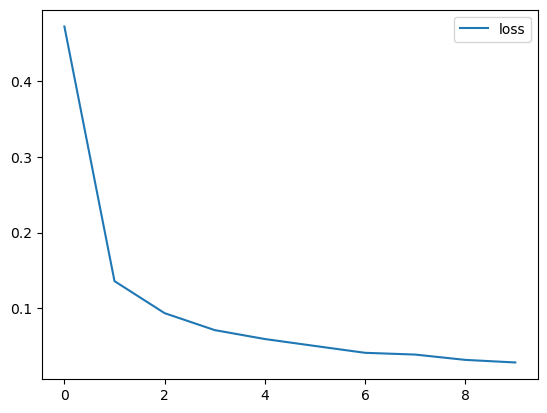

In [7]:
## definir el modelo
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(INPUT_SIZE,INPUT_SIZE)))
model.add(tf.keras.layers.LSTM(128)) #GRU o LSTM o SimpleRNN
model.add(Dense(labels.size))       #capa densa de 10 neuronas
model.add(Activation("softmax"))
model.summary()

#tf.keras.layers.Dense(128, activation='relu',input_shape=(28, 28, )),
#tf.keras.layers.Dropout(0.2,input_shape=(128,)),
#tf.keras.layers.Dense(10, activation='softmax')

## build the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#train the model
trainer=model.fit(X_train, y_train,
                  epochs=NUM_EPOCHS,
                  batch_size=BATCH_SIZE)
predictions = model.predict(X_test)
predIdxs = np.argmax(predictions, axis=1)

# Plot loss per iteration
plt.plot(trainer.history['loss'], label='loss')
plt.legend()

predIdxs[:10]



10 primeras imagenes de prueba: usando LSTM
etiqueta 10 primeras imagenes de prueba:   [7 2 1 0 4 1 4 9 5 9] 
prediccion 10 primeras imagenes de prueba: [7 2 1 0 4 1 4 9 5 9]
313/313 [==============================] - 5s 12ms/step - loss: 0.0481 - accuracy: 0.9868
Accuracy: 98.68


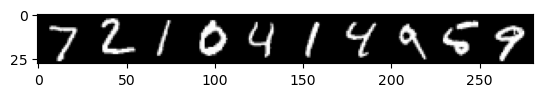

In [8]:
images =  np.zeros((28,1))
for i in range(10):
    image = X_test[i].reshape((28,28))    
    images=np.append(images,image,axis=1)
    
print("\n\n10 10 images with LSTM")    
plt.imshow(images,cmap="gray");

print("True label of 10 images :  ",y_test[:10],\
      "\nPredicted label       :",predIdxs[:10])

_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               60672     
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 61,962
Trainable params: 61,962
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
600/600 [==============================] - 22s 29ms/step - loss: 0.5129 - accuracy: 0.8303
Epoch 2/10
600/600 [==============================] - 17s 29ms/step - loss: 0.1463 - accuracy: 0.9557
Epoch 3/10
600/600 [==============================] - 18s 30ms/step - loss: 0.0965 - accuracy: 0.9710
Epoch 4/

array([7, 2, 1, 0, 4, 1, 4, 9, 8, 9], dtype=int64)

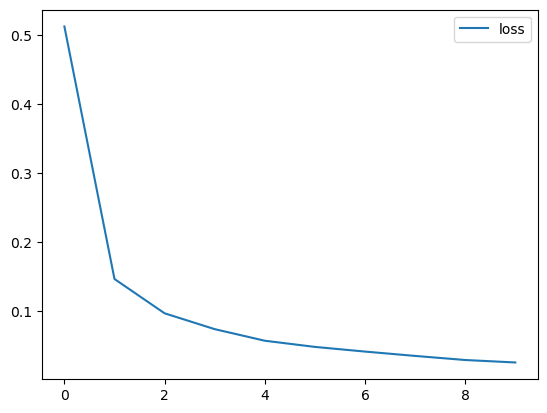

In [9]:
## definir el modelo
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(INPUT_SIZE,INPUT_SIZE)))
model.add(tf.keras.layers.GRU(128)) # #GRU o LSTM o SimpleRNN
model.add(Dense(labels.size))       #capa densa de 10 neuronas
model.add(Activation("softmax"))
model.summary()

#tf.keras.layers.Dense(128, activation='relu',input_shape=(28, 28, )),
#tf.keras.layers.Dropout(0.2,input_shape=(128,)),
#tf.keras.layers.Dense(10, activation='softmax')

## compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#entrenar el modelo
trainer=model.fit(X_train, y_train,
                  epochs=NUM_EPOCHS,
                  batch_size=BATCH_SIZE)
predictions = model.predict(X_test)
predIdxs = np.argmax(predictions, axis=1)
# Plot loss per iteration
plt.plot(trainer.history['loss'], label='loss')
plt.legend()

predIdxs[:10]




10 primeras imagenes de prueba
etiqueta 10 primeras imagenes de prueba:   [7 2 1 0 4 1 4 9 5 9] 
prediccion 10 primeras imagenes de prueba: [7 2 1 0 4 1 4 9 8 9]
313/313 [==============================] - 3s 7ms/step - loss: 0.0430 - accuracy: 0.9882
Accuracy: 98.82


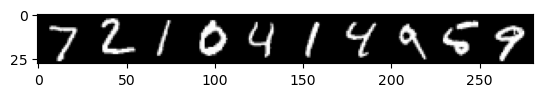

In [28]:
print("\nExperimento GRU: ")   
images =  np.zeros((28,1))
for i in range(10):
    image = X_test[i].reshape((28,28))    
    images=np.append(images,image,axis=1)
    
print("\n\n10 primeras imagenes de prueba: usando GRU")    
plt.imshow(images,cmap="gray");

print("etiqueta 10 primeras imagenes de prueba:  ",y_test[:10],\
      "\nprediccion 10 primeras imagenes de prueba:",predIdxs[:10])

_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 64)                5952      
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
 activation_6 (Activation)   (None, 10)                0         
                                                                 
Total params: 6,602
Trainable params: 6,602
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
600/600 [==============================] - 6s 8ms/step - loss: 0.6184 - accuracy: 0.8142
Epoch 2/10
600/600 [==============================] - 5s 9ms/step - loss: 0.2752 - accuracy: 0.9209
Epoch 3/10
600/600 [==============================] - 5s 9ms/step - loss: 0.2223 - accuracy: 0.9359
Epoch 4/10
600/6

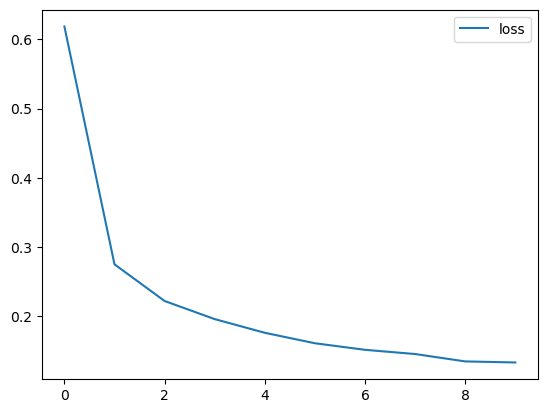

In [32]:
## definir el modelo
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(INPUT_SIZE,INPUT_SIZE)))
model.add(tf.keras.layers.SimpleRNN(HIDDEN_SIZE)) #GRU o LSTM o SimpleRNN
model.add(Dense(labels.size))       #capa densa de 10 neuronas
model.add(Activation("softmax"))
model.summary()


#tf.keras.layers.Dense(128, activation='relu',input_shape=(28, 28, )),
#tf.keras.layers.Dropout(0.2,input_shape=(128,)),
#tf.keras.layers.Dense(10, activation='softmax')

## compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#entrenar el modelo
trainer=model.fit(X_train, y_train,
                  epochs=NUM_EPOCHS,
                  batch_size=BATCH_SIZE)
predictions = model.predict(X_test)
predIdxs = np.argmax(predictions, axis=1)
# Plot loss per iteration
plt.plot(trainer.history['loss'], label='loss')
plt.legend()

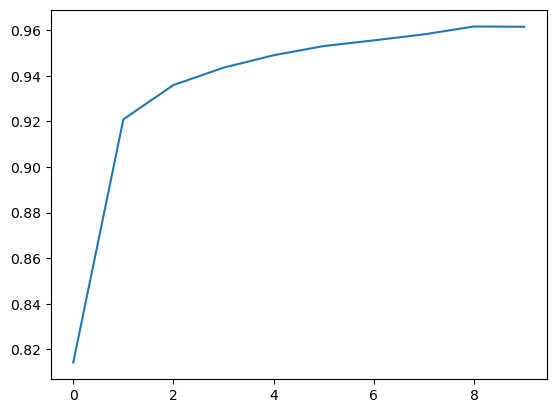

In [34]:
plt.plot(trainer.history['accuracy'], label='acc')


Experimento SIMPLE RNN: 


10 primeras imagenes de prueba
etiqueta 10 primeras imagenes de prueba:   [7 2 1 0 4 1 4 9 5 9] 
prediccion 10 primeras imagenes de prueba: [7 2 1 0 4 1 4 9 6 9]
313/313 [==============================] - 2s 3ms/step - loss: 0.1449 - accuracy: 0.9594
Accuracy: 95.94


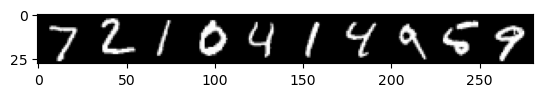

In [33]:
print("\nExperimento SIMPLE RNN: ")   
images =  np.zeros((28,1))
for i in range(10):
    image = X_test[i].reshape((28,28))    
    images=np.append(images,image,axis=1)
    
print("\n\n10 primeras imagenes de prueba")    
plt.imshow(images,cmap="gray");

print("etiqueta 10 primeras imagenes de prueba:  ",y_test[:10],\
      "\nprediccion 10 primeras imagenes de prueba:",predIdxs[:10])

_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:


trainer=model.fit(train_images, train_labels,validation_data=(test_images,test_labels), epochs=20,callbacks=my_callbacks)



# Plot loss per iteration
plt.plot(trainer.history['loss'], label='loss')
plt.plot(trainer.history['val_loss'], label='val_loss')
plt.legend()



In [ ]:


# Plot accuracy per iteration
plt.plot(trainer.history['accuracy'], label='acc')
plt.plot(trainer.history['val_accuracy'], label='val_acc')
plt.legend()

